In [1]:
import numpy as np
import numpy.polynomial.laguerre as geek
import numba as nb
import matplotlib.pyplot as plt
import ODESolve as ODE
import ODESolve_slow as ODEslow
import derivatives as der

In [2]:
def work(T, cT=0):
    N=500
    Emax= 10
    dm2= 2.5*10**-15
    th= .5*np.arcsin(.8)

    Eval= np.linspace(Emax/N, Emax, N)


    ym0= np.zeros((N,4))
    for i in range(len(ym0)):
        p0= 1/(np.exp(Eval[i])+1)
        ym0[i,:]= [p0,0,0,1]

    p= np.zeros(N+4)
    p[-1]= dm2
    p[-2]= th
    p[:N]= np.linspace(Emax/N, Emax, N)
    p[-3]= T
    p[-4]= cT
    
    t0= 0
    y0= der.array_maker(ym0)
    dt0=  0.01/np.max(np.abs(der.f(y0,y0,p)))

    N_step = 1000               
    dN = 5
    tau_final=10
    t_final = tau_final*2*2.2*T/dm2
    
    for i in range(3):
        t, y, dx, end = ODE.ODEOneRun(t0, y0, dt0, p, N_step, dN, t_final)

        if end:
            break
            
        dN *= np.ceil(t_final/t[-1]) + 1
        dN = int(dN)
        
    print("{}  dN = {}".format(i,dN))
        
    prob_ve= der.probability(ym0, Eval, t, y)
    tau= (dm2/(2*2.2*T))*t

    plt.figure()
    plt.plot(tau, prob_ve)
    plt.xlabel("Tau")
    plt.ylabel("Probability")
    plt.show()




1  dN = 25


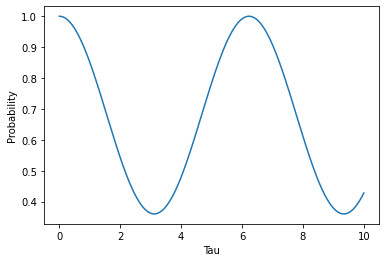

CPU times: user 52.4 s, sys: 140 ms, total: 52.5 s
Wall time: 52.5 s


In [3]:
%%time
work(0.5)

1  dN = 105


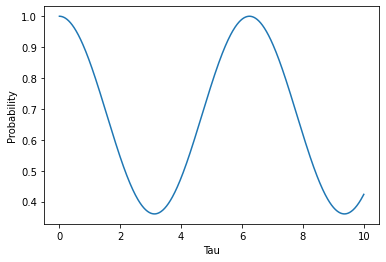

CPU times: user 2min 12s, sys: 364 ms, total: 2min 12s
Wall time: 2min 12s


In [4]:
%%time
work(0.75)

1  dN = 340


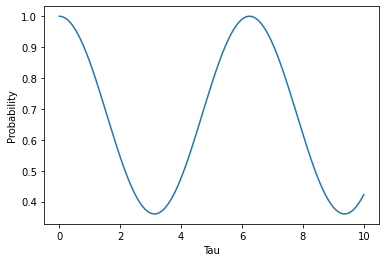

CPU times: user 5min 28s, sys: 883 ms, total: 5min 29s
Wall time: 5min 28s


In [5]:
%%time
work(1)

1  dN = 5435


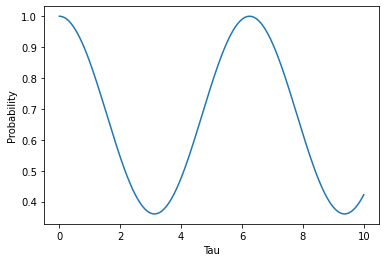

CPU times: user 50min 56s, sys: 8.22 s, total: 51min 4s
Wall time: 50min 58s


In [6]:
%%time
work(2)

1  dN = 77805


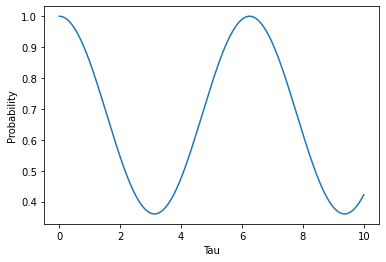

CPU times: user 13h 58min 47s, sys: 2min 8s, total: 14h 56s
Wall time: 13h 59min 20s


In [7]:
%%time
work(4)

1  dN = 25


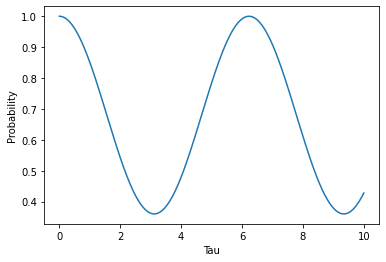

CPU times: user 40.5 s, sys: 103 ms, total: 40.6 s
Wall time: 40.5 s


In [8]:
%%time
work(0.5,1)

1  dN = 105


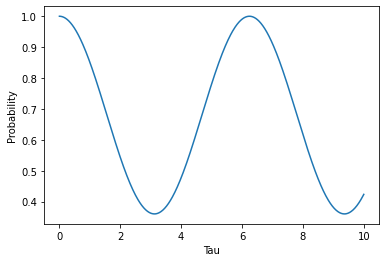

CPU times: user 2min 14s, sys: 358 ms, total: 2min 14s
Wall time: 2min 14s


In [9]:
%%time
work(0.75,1)

1  dN = 340


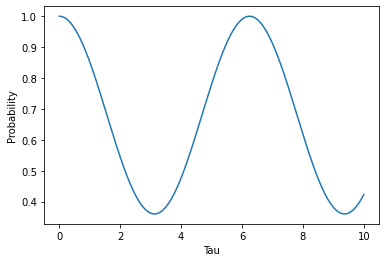

CPU times: user 5min 35s, sys: 838 ms, total: 5min 35s
Wall time: 5min 35s


In [10]:
%%time
work(1,1)

1  dN = 5440


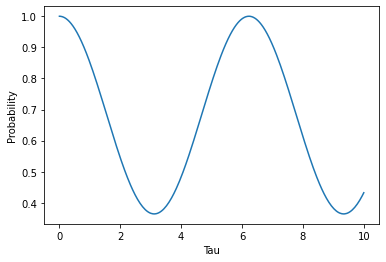

CPU times: user 51min 11s, sys: 5.09 s, total: 51min 16s
Wall time: 51min 15s


In [3]:
%%time
work(2,1)

1  dN = 79365


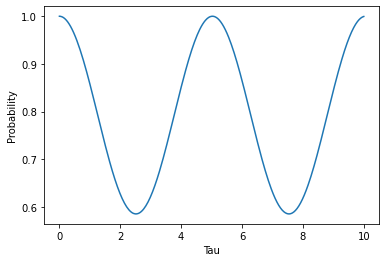

CPU times: user 13h 39min 49s, sys: 2min 14s, total: 13h 42min 4s
Wall time: 13h 40min 28s


In [4]:
%%time
work(4,1)